In [1]:
using JLD, PyPlot

In [104]:
archivo="../Evocada/antidromicamefluoquina/LFP_Promedio_310816_stim_antidromic_nbqx_apv_mfq6.jld"

"../Evocada/antidromicamefluoquina/LFP_Promedio_310816_stim_antidromic_nbqx_apv_mfq6.jld"

In [105]:
LFP=load(archivo)["LFPSaturados"]
saturados=load(archivo)["CanalesSaturados"]
respuestas=load(archivo)["Canalesrespuesta"];
retrazo=load(archivo)["retrazo"]
frecuencia=load(archivo)["freq"]

17.85550205219098

In [106]:
tantossaturados=length(saturados)
tantosrespuesta=length(respuestas);

In [107]:
texg=136
latencia=round(Int, ceil(1.5*frecuencia))
retrazo

90

In [108]:
iniciobusqueda=retrazo
finbusqueda=retrazo+10*latencia

360

In [109]:
xxsresp=zeros(tantosrespuesta)
yysresp=zeros(tantosrespuesta)
j=1
for q in respuestas
    xxsresp[j]=q[2]
    yysresp[j]=q[1]
    j+=1
end
xxssatu=zeros(tantossaturados)
yyssatu=zeros(tantossaturados)
j=1
for q in saturados
    xxssatu[j]=q[2]
    yyssatu[j]=q[1]
    j+=1
end

In [110]:
ejemplo=LFP[:,:,texg];

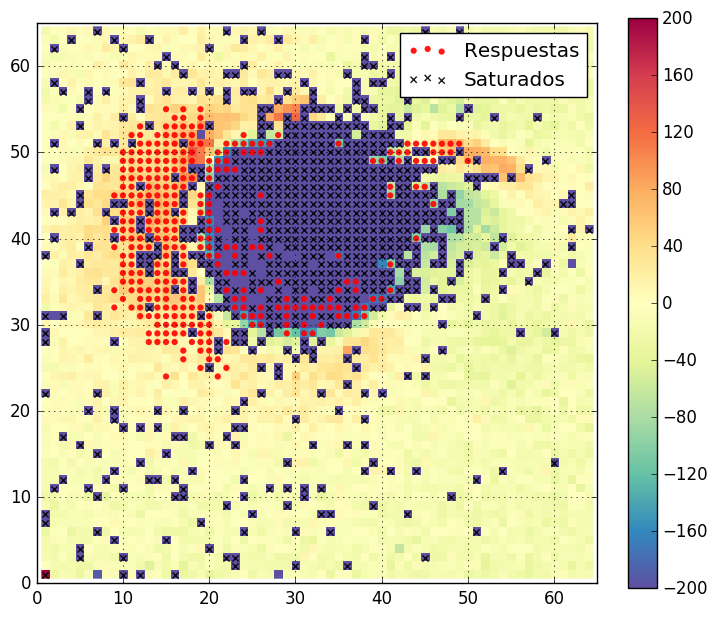

In [111]:
figure(figsize=(8,8))
xlim(0,65)
ylim(0,65)
grid()
limites=200
imagen=imshow(ejemplo, origin="lower", interpolation="nearest", cmap="Spectral_r", 
vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])
cb=colorbar(imagen, fraction=0.046)
scatter(xxsresp,yysresp, alpha=0.9, c="red", edgecolor="none", label="Respuestas")   
scatter(xxssatu,yyssatu, alpha=0.9, c="black", edgecolor="none", marker="x", label="Saturados") 
legend()
savefig("MapaSaturados.png",dpi=90)
#scatter(46,31)

In [112]:
tmax=size(LFP,3)

1163

In [113]:
mean(LFP[31,46,iniciobusqueda:finbusqueda])

-52.293840809501845

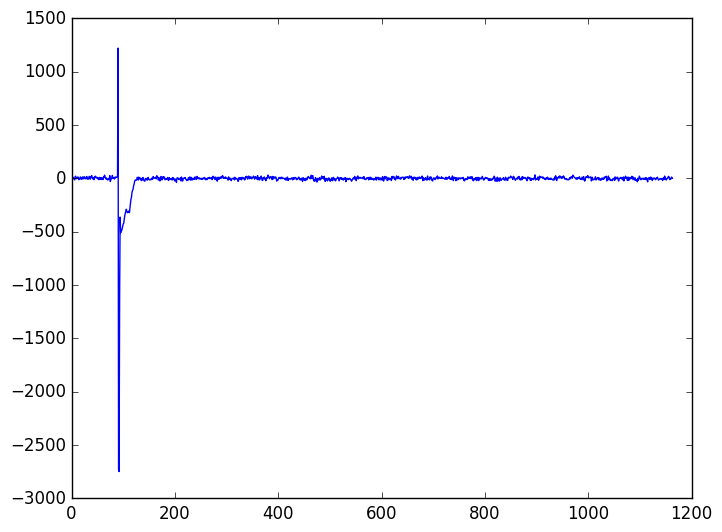

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7efd5cb493c8>

In [114]:
plot(1:tmax, vec(LFP[31,46,1:tmax]))

In [39]:
mean(ejemplo)

-20.38419246673584

In [ ]:

tmax=size(LFP,3)
for t=1:2
    ioff()
    PyPlot.ioff()
figure(figsize=(6,6))
xlim(0,65)
ylim(0,65)
    ejemplo=LFP[:,:,t]
imagen=imshow(ejemplo, origin="lower", interpolation="nearest", cmap="winter", 
vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])
cb=colorbar(imagen, fraction=0.046)
    if t>(tmax-140)

        scatter(xxsresp,yysresp, alpha=0.9, c="red", edgecolor="none")
        scatter(xxssatu,yyssatu, alpha=0.9, c="white", edgecolor="none", marker="s") 
    end
    savefig("LFP_Try_$t.png",dpi=90)
    close()
    PyPlot.close_figs()
end